In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import plotly.express as px

In [2]:
ai_df = pd.read_csv("ai_model_predictions.csv")
inventor_df = pd.read_csv("g_inventor_disambiguated.tsv", sep="\t")
location_df = pd.read_csv("g_location_disambiguated.tsv", sep="\t")
application_df = pd.read_csv("g_application.tsv", sep="\t")

/var/folders/p9/bgpcjxgn0rz4pvkjs39ch9740000gn/T/ipykernel_82552/1919336513.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  ai_df = pd.read_csv("ai_model_predictions.csv")
/var/folders/p9/bgpcjxgn0rz4pvkjs39ch9740000gn/T/ipykernel_82552/1919336513.py:4: DtypeWarning: Columns (0,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  application_df = pd.read_csv("g_application.tsv", sep="\t")


In [3]:
ai_df = ai_df[ai_df["flag_patent"] == 1].copy()
ai_df["pub_dt"] = pd.to_datetime(ai_df["pub_dt"])
ai_df["year"] = ai_df["pub_dt"].dt.year

In [4]:
merged_df = pd.merge(ai_df, application_df, left_on='appl_id', right_on='application_id', how='left')
merged_df[-5:]

,doc_id,flag_patent,pub_dt,appl_id,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,...,predict86_hardware,predict93_hardware,ai_score_hardware,year,application_id,patent_id,patent_application_type,filing_date,series_code,rule_47_flag
7898398,RE49766,1,2023-12-26,16560513,0,0,0,0,0,0,...,0,0,0.000016,2023,16560513,RE49766,16,2019-09-04,16,0.0
7898399,RE49767,1,2023-12-26,17396023,1,1,1,0,0,0,...,0,0,0.000361,2023,17396023,RE49767,17,2021-08-06,17,0.0
7898400,RE49768,1,2023-12-26,16902934,0,0,0,0,0,0,...,0,0,0.000984,2023,16902934,RE49768,16,2020-06-16,16,0.0
7898401,RE49769,1,2023-12-26,16850934,1,1,1,0,0,0,...,0,0,0.001543,2023,16850934,RE49769,16,2020-04-16,16,0.0
7898402,RE49770,1,2023-12-26,17241197,0,0,0,0,0,0,...,0,0,0.001013,2023,17241197,RE49770,17,2021-04-27,17,0.0


In [5]:
merged_df.drop(columns=['appl_id'], inplace=True)
merged_df[:5]

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,predict86_hardware,predict93_hardware,ai_score_hardware,year,application_id,patent_id,patent_application_type,filing_date,series_code,rule_47_flag
0,10000000,1,2018-06-19,0,0,0,0,0,0,0.000036,...,0,0,0.001062,2018,14643719,10000000,14,2015-03-10,14,0.0
1,10000001,1,2018-06-19,0,0,0,0,0,0,0.000183,...,0,0,0.000073,2018,14962323,10000001,14,2015-12-08,14,0.0
2,10000002,1,2018-06-19,1,1,1,0,0,0,0.000987,...,0,0,0.000369,2018,15107519,10000002,15,2014-12-30,15,0.0
3,10000003,1,2018-06-19,0,0,0,0,0,0,0.000066,...,0,0,0.000518,2018,14437961,10000003,14,2013-03-12,14,0.0
4,10000004,1,2018-06-19,0,0,0,0,0,0,0.000163,...,0,0,0.000068,2018,14973198,10000004,14,2015-12-17,14,0.0


In [6]:
#merge for getting location_id in this merged dataset using the inventor dataset
new_df = pd.merge(merged_df, inventor_df[['patent_id', 'location_id']], on='patent_id', how='left')
new_df[-5:]

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,predict93_hardware,ai_score_hardware,year,application_id,patent_id,patent_application_type,filing_date,series_code,rule_47_flag,location_id
18278673,RE49768,1,2023-12-26,0,0,0,0,0,0,0.000028,...,0,0.000984,2023,16902934,RE49768,16,2020-06-16,16,0.0,907f3ef5-16c8-11ed-9b5f-1234bde3cd05
18278674,RE49768,1,2023-12-26,0,0,0,0,0,0,0.000028,...,0,0.000984,2023,16902934,RE49768,16,2020-06-16,16,0.0,907f3ef5-16c8-11ed-9b5f-1234bde3cd05
18278675,RE49768,1,2023-12-26,0,0,0,0,0,0,0.000028,...,0,0.000984,2023,16902934,RE49768,16,2020-06-16,16,0.0,907f3ef5-16c8-11ed-9b5f-1234bde3cd05
18278676,RE49769,1,2023-12-26,1,1,1,0,0,0,0.000178,...,0,0.001543,2023,16850934,RE49769,16,2020-04-16,16,0.0,c1fc51de-16c7-11ed-9b5f-1234bde3cd05
18278677,RE49770,1,2023-12-26,0,0,0,0,0,0,0.000188,...,0,0.001013,2023,17241197,RE49770,17,2021-04-27,17,0.0,6e639a55-49af-11ed-9879-1234bde3cd05


In [7]:
new_merged_df = pd.merge(new_df, location_df, on='location_id', how='left')


In [8]:
new_merged_df[:5]

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,rule_47_flag,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips
0,10000000,1,2018-06-19,0,0,0,0,0,0,0.000036,...,0.0,198b0471-16c8-11ed-9b5f-1234bde3cd05,Manhattan Beach,CA,US,33.891599,-118.395124,Los Angeles,6.0,37.0
1,10000001,1,2018-06-19,0,0,0,0,0,0,0.000183,...,0.0,3eb37495-16c8-11ed-9b5f-1234bde3cd05,Ansan-si,NaN,KR,37.321715,126.830860,NaN,NaN,NaN
2,10000001,1,2018-06-19,0,0,0,0,0,0,0.000183,...,0.0,6c4ba08f-16c8-11ed-9b5f-1234bde3cd05,Gunpo-si,NaN,KR,37.361523,126.934903,NaN,NaN,NaN
3,10000002,1,2018-06-19,1,1,1,0,0,0,0.000987,...,0.0,755a6338-16c8-11ed-9b5f-1234bde3cd05,Yongin-si,NaN,KR,37.240574,127.178557,NaN,NaN,NaN
4,10000002,1,2018-06-19,1,1,1,0,0,0,0.000987,...,0.0,755a6338-16c8-11ed-9b5f-1234bde3cd05,Yongin-si,NaN,KR,37.240574,127.178557,NaN,NaN,NaN


In [9]:
new_merged_df[-5:]

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,rule_47_flag,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips
18278673,RE49768,1,2023-12-26,0,0,0,0,0,0,0.000028,...,0.0,907f3ef5-16c8-11ed-9b5f-1234bde3cd05,Taoyuan,NaN,TW,24.992999,121.301000,NaN,NaN,NaN
18278674,RE49768,1,2023-12-26,0,0,0,0,0,0,0.000028,...,0.0,907f3ef5-16c8-11ed-9b5f-1234bde3cd05,Taoyuan,NaN,TW,24.992999,121.301000,NaN,NaN,NaN
18278675,RE49768,1,2023-12-26,0,0,0,0,0,0,0.000028,...,0.0,907f3ef5-16c8-11ed-9b5f-1234bde3cd05,Taoyuan,NaN,TW,24.992999,121.301000,NaN,NaN,NaN
18278676,RE49769,1,2023-12-26,1,1,1,0,0,0,0.000178,...,0.0,c1fc51de-16c7-11ed-9b5f-1234bde3cd05,Encinitas,CA,US,33.036987,-117.291982,San Diego,6.0,73.0
18278677,RE49770,1,2023-12-26,0,0,0,0,0,0,0.000188,...,0.0,6e639a55-49af-11ed-9879-1234bde3cd05,Nam-dong,NaN,KR,37.224092,127.201236,NaN,NaN,NaN


In [10]:
df = new_merged_df
df.dropna(subset=["county","state_fips", "county_fips", "year"], inplace=True)

In [11]:
df[:5]

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,rule_47_flag,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips
0,10000000,1,2018-06-19,0,0,0,0,0,0,0.000036,...,0.0,198b0471-16c8-11ed-9b5f-1234bde3cd05,Manhattan Beach,CA,US,33.891599,-118.395124,Los Angeles,6.0,37.0
15,10000007,1,2018-06-19,0,0,0,0,0,0,0.000137,...,0.0,e8c44888-16c7-11ed-9b5f-1234bde3cd05,Brookfield,WI,US,43.057848,-88.126198,Waukesha,55.0,133.0
16,10000007,1,2018-06-19,0,0,0,0,0,0,0.000137,...,0.0,e0d46bcd-16c7-11ed-9b5f-1234bde3cd05,Grafton,WI,US,43.319727,-87.953423,Ozaukee,55.0,89.0
17,10000007,1,2018-06-19,0,0,0,0,0,0,0.000137,...,0.0,ea7e63b4-16c7-11ed-9b5f-1234bde3cd05,Cedarburg,WI,US,43.296655,-87.987535,Ozaukee,55.0,89.0
18,10000007,1,2018-06-19,0,0,0,0,0,0,0.000137,...,0.0,eba77012-16c7-11ed-9b5f-1234bde3cd05,West Allis,WI,US,43.016681,-88.007031,Milwaukee,55.0,79.0


In [12]:
df[-5:]

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,rule_47_flag,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips
18278665,RE49765,1,2023-12-26,0,0,0,0,0,0,0.000181,...,0.0,ef60d2b3-16c7-11ed-9b5f-1234bde3cd05,Melbourne,FL,US,28.106471,-80.637151,Brevard,12.0,9.0
18278670,RE49767,1,2023-12-26,1,1,1,0,0,0,0.000031,...,0.0,1893009c-16c8-11ed-9b5f-1234bde3cd05,San Diego,CA,US,32.717420,-117.162773,San Diego,6.0,73.0
18278671,RE49767,1,2023-12-26,1,1,1,0,0,0,0.000031,...,0.0,06a6c203-16c8-11ed-9b5f-1234bde3cd05,Hollis,NH,US,42.743162,-71.591333,Hillsborough County,33.0,11.0
18278672,RE49767,1,2023-12-26,1,1,1,0,0,0,0.000031,...,0.0,0e1a2668-16c8-11ed-9b5f-1234bde3cd05,Merrimack,NH,US,42.865086,-71.493400,Hillsborough County,33.0,11.0
18278676,RE49769,1,2023-12-26,1,1,1,0,0,0,0.000178,...,0.0,c1fc51de-16c7-11ed-9b5f-1234bde3cd05,Encinitas,CA,US,33.036987,-117.291982,San Diego,6.0,73.0


In [13]:
df['state_fips'] = df['state_fips'].astype(int).astype(str).str.zfill(2)
df['county_fips'] = df['county_fips'].astype(int).astype(str).str.zfill(3)

In [14]:
df[-5:]

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,rule_47_flag,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips
18278665,RE49765,1,2023-12-26,0,0,0,0,0,0,0.000181,...,0.0,ef60d2b3-16c7-11ed-9b5f-1234bde3cd05,Melbourne,FL,US,28.106471,-80.637151,Brevard,12,009
18278670,RE49767,1,2023-12-26,1,1,1,0,0,0,0.000031,...,0.0,1893009c-16c8-11ed-9b5f-1234bde3cd05,San Diego,CA,US,32.717420,-117.162773,San Diego,06,073
18278671,RE49767,1,2023-12-26,1,1,1,0,0,0,0.000031,...,0.0,06a6c203-16c8-11ed-9b5f-1234bde3cd05,Hollis,NH,US,42.743162,-71.591333,Hillsborough County,33,011
18278672,RE49767,1,2023-12-26,1,1,1,0,0,0,0.000031,...,0.0,0e1a2668-16c8-11ed-9b5f-1234bde3cd05,Merrimack,NH,US,42.865086,-71.493400,Hillsborough County,33,011
18278676,RE49769,1,2023-12-26,1,1,1,0,0,0,0.000178,...,0.0,c1fc51de-16c7-11ed-9b5f-1234bde3cd05,Encinitas,CA,US,33.036987,-117.291982,San Diego,06,073


In [15]:
print(df.columns.tolist())


['doc_id', 'flag_patent', 'pub_dt', 'predict50_any_ai', 'predict86_any_ai', 'predict93_any_ai', 'predict50_ml', 'predict86_ml', 'predict93_ml', 'ai_score_ml', 'predict50_evo', 'predict86_evo', 'predict93_evo', 'ai_score_evo', 'predict50_nlp', 'predict86_nlp', 'predict93_nlp', 'ai_score_nlp', 'predict50_speech', 'predict86_speech', 'predict93_speech', 'ai_score_speech', 'predict50_vision', 'predict86_vision', 'predict93_vision', 'ai_score_vision', 'predict50_planning', 'predict86_planning', 'predict93_planning', 'ai_score_planning', 'predict50_kr', 'predict86_kr', 'predict93_kr', 'ai_score_kr', 'predict50_hardware', 'predict86_hardware', 'predict93_hardware', 'ai_score_hardware', 'year', 'application_id', 'patent_id', 'patent_application_type', 'filing_date', 'series_code', 'rule_47_flag', 'location_id', 'disambig_city', 'disambig_state', 'disambig_country', 'latitude', 'longitude', 'county', 'state_fips', 'county_fips']


In [16]:
df_2018  = df[df['year'] == 2018].copy()
df_2018


,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,rule_47_flag,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips
0,10000000,1,2018-06-19,0,0,0,0,0,0,0.000036,...,0.0,198b0471-16c8-11ed-9b5f-1234bde3cd05,Manhattan Beach,CA,US,33.891599,-118.395124,Los Angeles,06,037
15,10000007,1,2018-06-19,0,0,0,0,0,0,0.000137,...,0.0,e8c44888-16c7-11ed-9b5f-1234bde3cd05,Brookfield,WI,US,43.057848,-88.126198,Waukesha,55,133
16,10000007,1,2018-06-19,0,0,0,0,0,0,0.000137,...,0.0,e0d46bcd-16c7-11ed-9b5f-1234bde3cd05,Grafton,WI,US,43.319727,-87.953423,Ozaukee,55,089
17,10000007,1,2018-06-19,0,0,0,0,0,0,0.000137,...,0.0,ea7e63b4-16c7-11ed-9b5f-1234bde3cd05,Cedarburg,WI,US,43.296655,-87.987535,Ozaukee,55,089
18,10000007,1,2018-06-19,0,0,0,0,0,0,0.000137,...,0.0,eba77012-16c7-11ed-9b5f-1234bde3cd05,West Allis,WI,US,43.016681,-88.007031,Milwaukee,55,079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18271193,RE47177,1,2018-12-25,0,0,0,0,0,0,0.000537,...,0.0,c7e001c0-16c7-11ed-9b5f-1234bde3cd05,Los Altos Hills,CA,US,37.379663,-122.137464,Santa Clara,06,085
18271194,RE47178,1,2018-12-25,0,0,0,0,0,0,0.000089,...,0.0,02bfdd25-16c8-11ed-9b5f-1234bde3cd05,Charlottesville,VA,US,38.029306,-78.476678,Charlottesville (city),51,540
18271195,RE47178,1,2018-12-25,0,0,0,0,0,0,0.000089,...,0.0,02bfdd25-16c8-11ed-9b5f-1234bde3cd05,Charlottesville,VA,US,38.029306,-78.476678,Charlottesville (city),51,540
18271209,RE47182,1,2018-12-25,0,0,0,0,0,0,0.000291,...,0.0,c8ea0862-16c7-11ed-9b5f-1234bde3cd05,Plano,TX,US,33.013676,-96.692510,Collin,48,085


In [17]:
df_2022  = df[df['year'] == 2022].copy()
df_2022

,doc_id,flag_patent,pub_dt,predict50_any_ai,predict86_any_ai,predict93_any_ai,predict50_ml,predict86_ml,predict93_ml,ai_score_ml,...,rule_47_flag,location_id,disambig_city,disambig_state,disambig_country,latitude,longitude,county,state_fips,county_fips
3572841,11212952,1,2022-01-04,0,0,0,0,0,0,0.000160,...,0.0,f69d8c9b-16c7-11ed-9b5f-1234bde3cd05,Statesboro,GA,US,32.449014,-81.783291,Bulloch,13,031
3572842,11212953,1,2022-01-04,1,0,0,0,0,0,0.000265,...,0.0,cca4eec9-16c7-11ed-9b5f-1234bde3cd05,Geneseo,IL,US,41.452517,-90.154836,Henry,17,073
3572843,11212953,1,2022-01-04,1,0,0,0,0,0,0.000265,...,0.0,cca4eec9-16c7-11ed-9b5f-1234bde3cd05,Geneseo,IL,US,41.452517,-90.154836,Henry,17,073
3572844,11212953,1,2022-01-04,1,0,0,0,0,0,0.000265,...,0.0,e95c053b-16c7-11ed-9b5f-1234bde3cd05,Kewanee,IL,US,41.245593,-89.924830,Henry,17,073
3572845,11212953,1,2022-01-04,1,0,0,0,0,0,0.000265,...,0.0,df626b52-16c7-11ed-9b5f-1234bde3cd05,Bettendorf,IA,US,41.525276,-90.509639,Scott,19,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18277427,RE49348,1,2022-12-27,0,0,0,0,0,0,0.000027,...,0.0,d5b79841-16c7-11ed-9b5f-1234bde3cd05,Duncan,OK,US,34.502303,-97.957813,Stephens,40,137
18277428,RE49348,1,2022-12-27,0,0,0,0,0,0,0.000027,...,0.0,d20d9c12-16c7-11ed-9b5f-1234bde3cd05,Hastings,OK,US,34.226758,-98.110040,Jefferson,40,067
18277429,RE49349,1,2022-12-27,0,0,0,0,0,0,0.000032,...,0.0,08419561-16c8-11ed-9b5f-1234bde3cd05,Bolton,MA,US,42.434234,-71.609774,Worcester County,25,027
18277430,RE49349,1,2022-12-27,0,0,0,0,0,0,0.000032,...,0.0,0e5b67a1-16c8-11ed-9b5f-1234bde3cd05,North Andover,MA,US,42.683989,-71.112707,Essex County,25,009


In [18]:
grouped_2018 = df_2018.groupby('disambig_state').size().reset_index(name='patent_count')
grouped_2018

,disambig_state,patent_count
0,AK,92
1,AL,1122
2,AR,894
3,AZ,7044
4,CA,119783
5,CO,7509
6,CT,7737
7,DC,576
8,DE,923
9,FL,9158


In [19]:
grouped_2022 = df_2022.groupby('disambig_state').size().reset_index(name='patent_count')
grouped_2022

,disambig_state,patent_count
0,AK,88
1,AL,1174
2,AR,773
3,AZ,7575
4,CA,135782
5,CO,8262
6,CT,7202
7,DC,756
8,DE,905
9,FL,10174


In [20]:
fig = px.scatter_geo(grouped_2018,
                     locations="disambig_state",
                     locationmode="USA-states",
                     size="patent_count",
                     color="patent_count",
                     scope="usa",
                     title="Patent Count by U.S. State for 2018",
                     size_max=50,
                     hover_name="disambig_state",
                     projection="albers usa")

fig.show()

In [21]:
fig = px.scatter_geo(grouped_2022,
                     locations="disambig_state",
                     locationmode="USA-states",
                     size="patent_count",
                     color="patent_count",
                     scope="usa",
                     title="Patent Count by U.S. State for 2022",
                     size_max=50,
                     hover_name="disambig_state",
                     projection="albers usa")

fig.show()

In [22]:
grouped_full_df = df.groupby(['year', 'disambig_state']).size().reset_index(name='patent_count')
grouped_full_df

,year,disambig_state,patent_count
0,1976,AL,2
1,1976,AZ,2
2,1976,CA,35
3,1976,CO,1
4,1976,CT,10
...,...,...,...
2468,2023,VT,1098
2469,2023,WA,22670
2470,2023,WI,7802
2471,2023,WV,216


In [23]:
fig = px.scatter_geo(
    grouped_full_df,
    locations="disambig_state",
    locationmode="USA-states",
    color="patent_count",
    size="patent_count",
    animation_frame="year",  # Adds the slider!
    scope="usa",
    size_max=50,
    title="Patent Count by U.S. State (1976–2023)",
    hover_name="disambig_state"
)

In [25]:
fig.show()

In [26]:
df_filtered = df[df['year'].between(2018, 2023)]

In [27]:
def compute_top_n_share(df, top_n=5):
    yearly_total = df.groupby('year').size().reset_index(name='total_patents')
    yearly_state = df.groupby(['year', 'disambig_state']).size().reset_index(name='state_patents')
    
    result = []
    for year in sorted(df['year'].unique()):
        year_data = yearly_state[yearly_state['year'] == year]
        total = yearly_total[yearly_total['year'] == year]['total_patents'].values[0]
        top_states = year_data.sort_values('state_patents', ascending=False).head(top_n)

        top_share = top_states['state_patents'].sum() / total * 100
        top_state_names = top_states['disambig_state'].tolist()

        result.append({
            'year': year,
            f'top_{top_n}_state_share_percent': round(top_share, 2),
            f'top_{top_n}_states': ', '.join(top_state_names)
        })
    
    return pd.DataFrame(result)
compute_top_n_share(df)


,year,top_5_state_share_percent,top_5_states
0,1976,47.90,"IL, NJ, CA, NY, PA"
1,1977,48.20,"CA, NY, NJ, IL, PA"
2,1978,46.80,"CA, NY, NJ, IL, PA"
3,1979,45.86,"CA, NJ, NY, IL, PA"
4,1980,45.55,"CA, NY, NJ, IL, PA"
5,1981,43.96,"CA, NY, NJ, PA, IL"
6,1982,44.61,"CA, NY, NJ, PA, IL"
7,1983,43.59,"CA, NY, NJ, PA, IL"
8,1984,43.16,"CA, NY, NJ, IL, PA"
9,1985,42.94,"CA, NY, NJ, IL, TX"


In [28]:
def compute_percent_change(df):
    pre = df[df['year'].isin([2018, 2019])].groupby('disambig_state').size().reset_index(name='pre_avg')
    post = df[df['year'].isin([2021, 2022, 2023])].groupby('disambig_state').size().reset_index(name='post_avg')
    
    merged = pd.merge(pre, post, on='disambig_state')
    merged['percent_change'] = ((merged['post_avg'] - merged['pre_avg']) / merged['pre_avg']) * 100
    return merged.sort_values('percent_change', ascending=False)

In [29]:
def compute_states_above_threshold(df, threshold=65000):
    grouped = df.groupby(['year', 'disambig_state']).size().reset_index(name='patent_count')
    above_threshold = grouped[grouped['patent_count'] > threshold]
    count_per_year = above_threshold.groupby('year')['disambig_state'].count().reset_index(name='states_above_threshold')
    return count_per_year


In [30]:
top_n_df = compute_top_n_share(df_filtered, top_n=5)
percent_change_df = compute_percent_change(df_filtered)
states_threshold_df = compute_states_above_threshold(df_filtered, threshold=5000)

In [31]:
top_n_df[:]

,year,top_5_state_share_percent,top_5_states
0,2018,52.44,"CA, TX, NY, MA, WA"
1,2019,53.25,"CA, TX, NY, WA, MA"
2,2020,53.54,"CA, TX, NY, WA, MA"
3,2021,53.61,"CA, TX, NY, WA, MA"
4,2022,53.71,"CA, TX, MA, WA, NY"
5,2023,54.20,"CA, TX, MA, WA, NY"


Top 5 State Share:
    year  top_5_state_share_percent        top_5_states
0  2018                      52.44  CA, TX, NY, MA, WA
1  2019                      53.25  CA, TX, NY, WA, MA
2  2020                      53.54  CA, TX, NY, WA, MA
3  2021                      53.61  CA, TX, NY, WA, MA
4  2022                      53.71  CA, TX, MA, WA, NY
5  2023                      54.20  CA, TX, MA, WA, NY

Percent Change (Pre vs Post COVID):
    disambig_state  pre_avg  post_avg  percent_change
48             VI        7        21      200.000000
14             ID     4340     10013      130.714286
27             MT      762      1483       94.619423
47             VA    13977     24806       77.477284
7              DC     1382      2447       77.062229


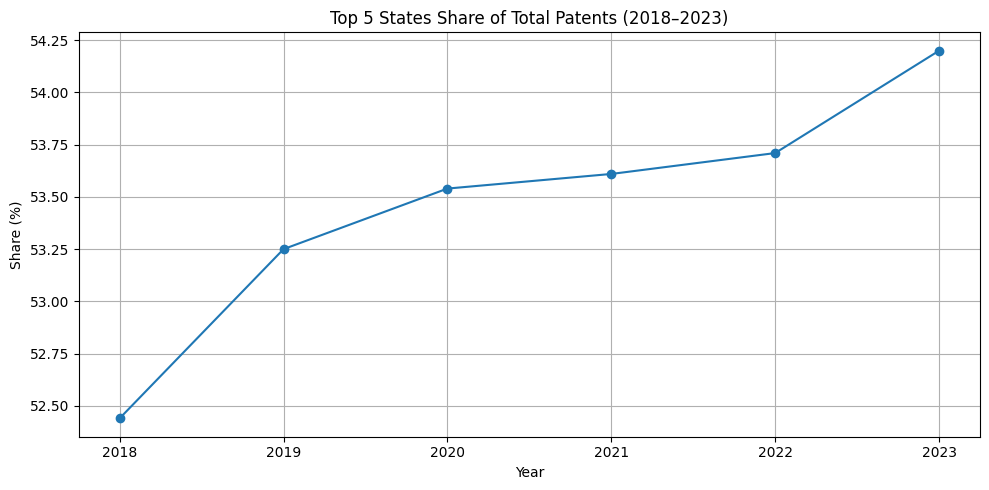

In [32]:
print("Top 5 State Share:\n", top_n_df)
print("\nPercent Change (Pre vs Post COVID):\n", percent_change_df.head())

plt.figure(figsize=(10, 5))
plt.plot(top_n_df['year'], top_n_df['top_5_state_share_percent'], marker='o')
plt.title('Top 5 States Share of Total Patents (2018–2023)')
plt.xlabel('Year')
plt.ylabel('Share (%)')
plt.grid(True)
plt.tight_layout()
plt.show()





States Above 45000 Patents/Year:
    year  states_above_threshold
0  2018                      22
1  2019                      22
2  2020                      22
3  2021                      22
4  2022                      22
5  2023                      22


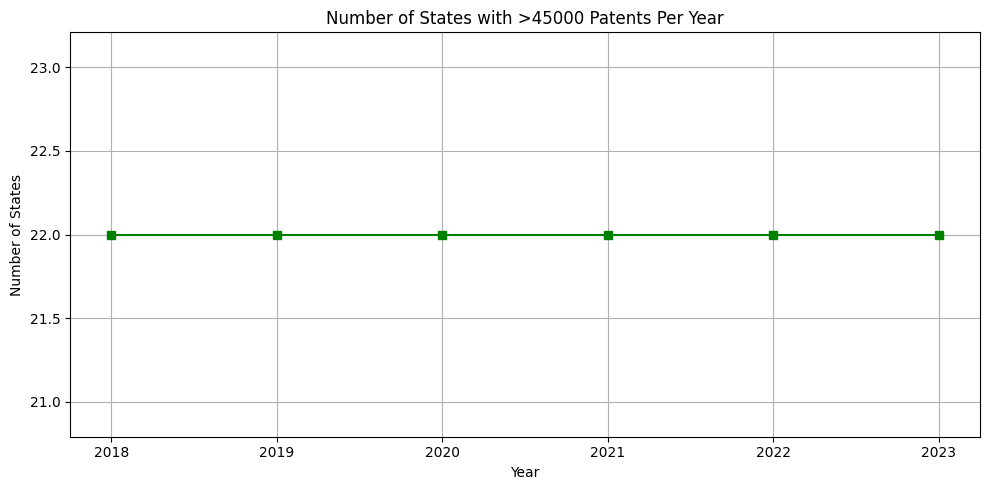

In [33]:
print("\nStates Above 45000 Patents/Year:\n", states_threshold_df)
plt.figure(figsize=(10, 5))
plt.plot(states_threshold_df['year'], states_threshold_df['states_above_threshold'], marker='s', color='green')
plt.title('Number of States with >45000 Patents Per Year')
plt.xlabel('Year')
plt.ylabel('Number of States')
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:

fig = px.bar(percent_change_df.sort_values('percent_change', ascending=False),
             x='disambig_state', y='percent_change',
             title='Percent Change in Patent Count per State (Pre vs Post COVID)',
             labels={'percent_change': 'Percent Change (%)'},
             color='percent_change',
             color_continuous_scale='RdYlGn')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [35]:
state_counts = new_merged_df.groupby('disambig_state').size().reset_index(name='patent_count')


In [36]:
print(state_counts)

   disambig_state  patent_count
0              AK          1930
1              AL         25834
2              AR         13143
3              AS             1
4              AZ        132693
5              CA       2101519
6              CO        148240
7              CT        151272
8              DC          9068
9              DE         27695
10             FL        183803
11             GA        118464
12             GU            25
13             HI          5150
14             IA         52159
15             ID         57246
16             IL        293116
17             IN        115628
18             KS         38884
19             KY         36146
20             LA         22391
21             MA        406219
22             MD        110916
23             ME         13800
24             MI        322505
25             MN        244431
26             MO         69263
27             MP             4
28             MS          8770
29             MT          7432
30      

In [80]:
state_counts.to_csv('total_patents.csv', index=False)
